/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


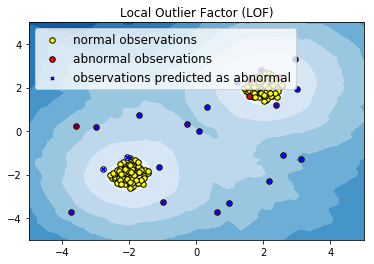

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs
np.random.seed(42)

# Generate train data
X = 0.3 * np.random.randn(100, 2)

# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X + 2, X - 2, X_outliers]

# fit the model
clf = LocalOutlierFactor(n_neighbors=20)
y_pred = clf.fit_predict(X)

ANOMALY_DATA = -1
predicted_outlier_index = np.where(y_pred == ANOMALY_DATA)
predicted_outlier = X[predicted_outlier_index]

# plot the level sets of the decision function
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf._decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Local Outlier Factor (LOF)")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

a = plt.scatter(
    X[:200, 0], X[:200, 1], c= 'yellow', edgecolor= 'k', s= 30, marker= 'o'
)
b = plt.scatter(
    X[200:, 0], X[200:, 1], c= 'red', edgecolor= 'k', s= 30, marker= 'o'
)
c = plt.scatter(
    predicted_outlier[:, 0], predicted_outlier[:, 1], c= 'blue', edgecolor= 'k', s= 10, marker= 'x'
)
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a, b, c],
           ["normal observations",
            "abnormal observations",
            "observations predicted as abnormal"],
           loc="upper left", prop={'size': 12})
plt.show()